# 선형 회귀

* k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이의 이해 
* scikit-learn을 사용해 여러 가지 선형 회귀 모델을 생성 
* 통계적 관점 및 머신러닝 관점의 회귀분석의 차이

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## k-최근접 이웃의 한계

* 데이터 셋 준비 

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

* 이전 장에서 사용한 k-NN 회귀 모델을 사용하여 50cm인 농어의 무게를 예측 

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


* 50cm의 농어의 무게를 1,033g 정도로 모델이 예측했지만 실제 이 농어의 무게는 휠씬 더 많이 나갈 것이다. 
* 주어진 데이터와 50cm의 농어의 데이터를 산점도(scatter)로 시각화하여 보자 

In [5]:
import matplotlib.pyplot as plt

* 아래 knr.kneighbors의 50의 값을 입력하면 해당 값을 예측하기 위한 이웃의 값을 리턴해준다. 
* 아래 그림에서 예측할 때 사용된 이웃의 데이터를 보면 모두 45cm 근처에서 나왔다. 이로 인해서 50cm이상의 값은 절대로 정상적인 값이 나올수 없다
* K-NN은 주변 데이터를 기반으로 하기 때문에 이런 문제가 발생합니다.

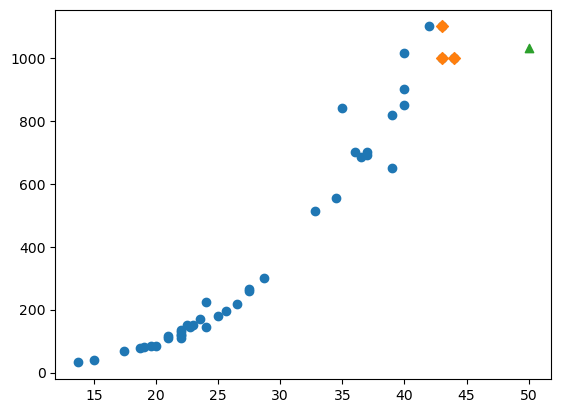

In [6]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

* 실제로 3개의 이웃 데이터로 평균을 구하면 예측된 값과 같다 

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


* 50cm이상의 그 어떤 값이 나오더라도 절대로 1033이외의 값이 나올수 없는 한계가 있다 

In [8]:
print(knr.predict([[100]]))

[1033.33333333]


#### 기업에서 머신러닝을 사용할때는?
* 데이터는 시간과 환경이 변화면서 바뀌기 때문에 기업에서는 주기적으로 학습을 진행한다. 
* 회사마다 하루, 혹은 일주일, 한달이 될 수도 있으며, 모델의 특성 및 회사의 정책에 따라서 결정된다. 

## 선형 회귀
* 선형회귀(linear regression)는 널리 사용되는 대표적인 회귀 알고리즘입니다. 
* 비교적 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나입니다. 
* 선형이란 말에서 짐작할 수 있듯이 특성이 하나인 어떤 직선을 학습하는 알고리즘입니다.

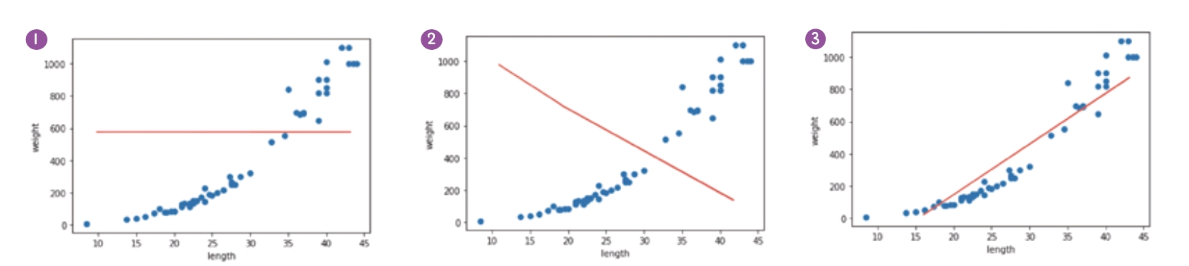

* 1은 모든 농어의 무게를 하나로 예측합니다. $ R^2$는 0에 가까운 값이 됩니다. 
* 2은 완전히 반대로 예측합니다. $ R^2$ 값이 음수가 될 수 있습니다. 
* 3은 가장 그럴싸한 직선입니다. 

* LinearRegression 클래스로 선형 회귀 알고리즘을 사용할 수 있습니다. 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [11]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [12]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


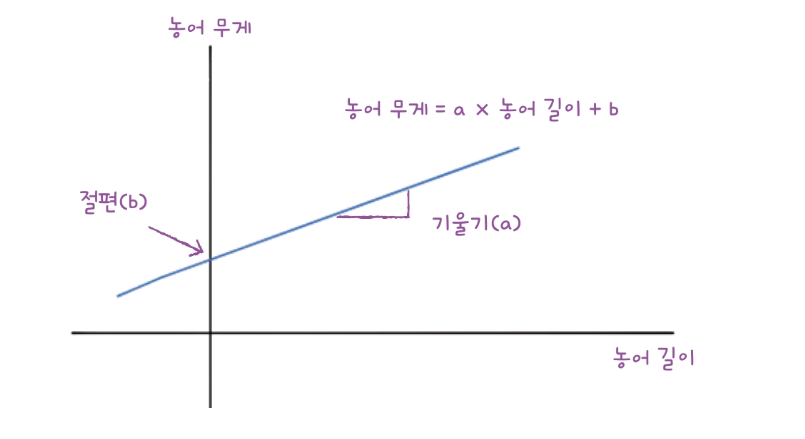

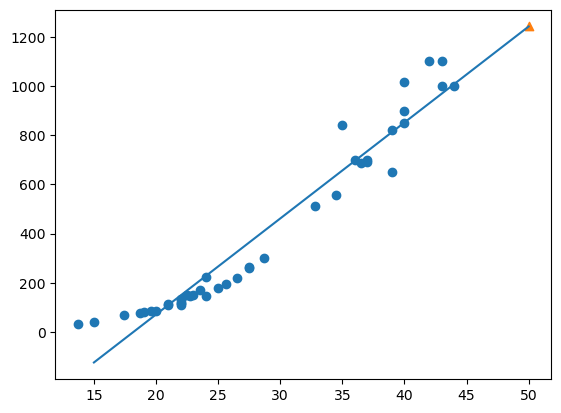

In [13]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

* $ R^2$ 점수를 확인해봅시다

In [14]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 통계 패키지의 선형회귀

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
y = perch_weight
X = perch_length
X = sm.add_constant(X)

In [17]:
X[:3]

array([[ 1. ,  8.4],
       [ 1. , 13.7],
       [ 1. , 15. ]])

* 선형회귀 계산 세팅

In [18]:
linear_regression = sm.OLS(y, X)

* 회귀계수 추정을 한다. 

In [19]:
fitted_model = linear_regression.fit()

In [20]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     612.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.78e-31
Time:                        09:41:44   Log-Likelihood:                -336.24
No. Observations:                  56   AIC:                             676.5
Df Residuals:                      54   BIC:                             680.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -648.0776     43.705    -14.828      0.000    -735.702    -560.454
x1            36.9384      1.492     24.756      0.000      33.947      39.930
==============================================================================
Omnibus:                       14.223   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.705
Skew:                           1.101   Prob(JB):                     0.000389
Kurtosis:                       4.373   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Dep. Variable : 목표변수를 나타낸다. 
* Model : 적합 모델을 나타낸다. OLS는 선형회귀의 또 다른 방법으로 ordinary least squares의 약어이다.
    *  잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다.
* Method : 파라미터 적합 방법을 나타낸다. 최소제곱 방법은 고전적인 계산 방법이다. 
* No. Observations : 사용된 관찰 개수를 나타낸다. 
* DF Residuals : 잔차의 자유도를 나타낸다. 관찰 개수에서 파라미터의 수를 뺀 값 
* DF Model : 모델에서 추정하는 파라미터의 개수. 상수항은 제외한다. 

----
* R-Squared : 결정계수로, 회귀가 단순평균과 관련해 얼마나 잘 수행했는지 나타낸다. 
* Adj R-Squared : 모델의 파라미터 개수와 모델 구축에 도움이 된 관찰 개수에 따라 조정된 결정계수를 나타낸다. 
* F-statistic : 통계적 관점에서 볼 때 편향을 제외한 모든 계수가 0과 다른지 나타내는 척도. 간단히 말해서 회귀가 단순평균보다 나은지 보여준다. 
* Prob(F-statistic) : 실제로 사용된 관찰로 인해 운 좋게 F-statistic에 도달할 확률을 나타내며, p-value라고 한다. 그 값이 충분히 낮다면 회귀가 단순평균보다 휠씬 더 좋다는 것을 확신할 수 있다. 
* AIC : 관찰 개수와 모델 자체의 복잡성을 기반으로 모델을 평가하는 점수. AIC 점수가 낮을수록 더 좋다ㅓ. 다양한 모델을 비교하여 통계 변수를 선택할 때 매우 우용한다. 
* BIC : AIC와 유사하게 작동하나 파라미터가 많은 모델에 대해 더 많은 단점을 갖는다. 

-------------------
* coef : 추정계수를 나타낸다.
* std err: 계수 추정치의 표준오차로, 값이 크면 클수록 계수 추정치의 불확실성이 높아진다. 
* t : t-value으로 계수의 참값이 0과 다른지를 나타내는 척도 
: P > |t| : 계수가 0이 아닐 확률을 나타내는 p값 
* Conf. Interval : : 다른 관찰값과 추정계수가 다를 수 있는 모든 가능성에 대해 계수의 상한값과 하한값 모두 95%로 고려함을 의미힌다. 
* 데이터 과학 관점에서는 대부분 응답변수를 예측하는 동안 회귀가 작동하는지 여부를 확인하는 데에만 주로 관심이 있기 때문에 t-test와 신뢰 영역은 별로 중요하게 생각하지 않는다. 따라서 coef 값과 표준오차에만 초점을 맞출 것이다. 

-------------
* Skewnewss(비대칭도) : 평균 주위 잔차의 대칭을 측정한 것으로, 대칭 분포 잔차의 경우에는 값이 0에 가까워야 한다. 양수값은 오른쪽으로 긴 꼬리를 나타내고, 음수값은 왼쪽으로 긴 꼬리를 나타낸다. 
* Kurtosis(첨도) : 잔차의 분포 모양을 측정한 것으로, 종 모양의 분포이면 0의 값을 갖는다. 음수값은 아주 평평한 분포이고, 양수값은 매우 뽀죡한 분포를 갖는다. 
* Omnibus : 비대칭도와 첨도를 결합한 통계 테스트 
* Prob(Omnibus) : 옴니버스 통계를 확률로 변환 
* Jarque-Bera : 비대칭도와 첨도의 또 다른 테스트
* Prob(JB) : JB 통계를 확률로 변환한 것 
* Durbin-Watson : 잔차 사이의 상관관계 여부를 나타내는 테스트. 시간 기반 데이터 분석과 관련이 있다. 
* Cond No : 다중공선성(multicollinearity)에 대한 테스트. 여러 개의 예측변수를 작업할 때 사용 

------------

* 많은 통계 테스트와 정보를 포함하는 꽤 긴 일련의 표를 얻을 수 있다. 분석 목적이 통계적인 것이 아니라면 실제로 이런 아웃풋이 모두 필요한 것은 아니다. 
* 데이터 과학은 주로 통계적 문제에 대해 형식적으로 정확한 사양이 아닌, 실제 데이터를 예측하는 실제 모델과 관련이 있다. 
* 그럼에도 불구하고 일부는 여전히 좋은 모델을 만들기 위해서 유용하며 주요 수치에 대한 통찰력을 제공할 것이다. 

In [21]:
print (fitted_model.params)

[-648.07755825   36.93837597]


y = 36.93*x - 648.07

In [22]:
fitted_model.predict([[1,50]])

array([1198.84124015])

* 이상적으로 회귀모델의 제곱오차의 합계를 0으로 줄인다면, 설명된 변동의 최대 비율인 1의 값을 얻을 수 있다. 
* 또한 $ R^2 $ 측정값은 예측변수와 목표변수 사이의 상관계수를 제곱해서 얻은 비율과도 비교할 수 있다. 

In [23]:
def pearson(x,y):
    exy = (x*y).mean()
    ex = x.mean()
    ey = y.mean()
    exx = (x*x).mean()
    ex2 = x.mean()**2
    eyy = (y*y).mean()
    ey2 = y.mean()**2
    return (exy - ex*ey)/(np.sqrt(exx-ex2)*np.sqrt(eyy-ey2))

In [24]:
pearson(perch_length, perch_weight) ** 2

0.9190210732447834

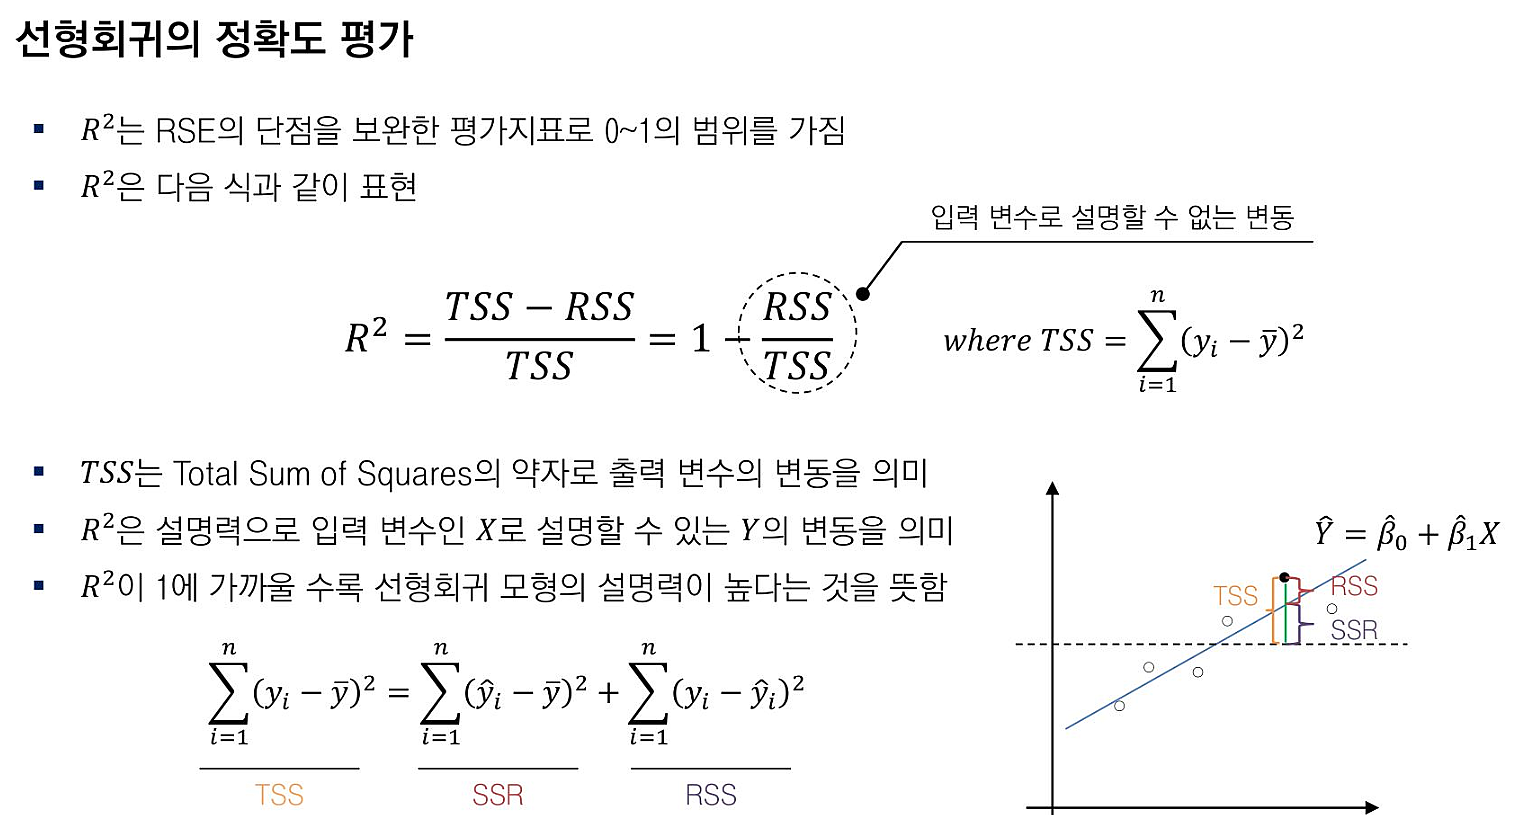

### 비용 함수 최소화
* 선형 회귀의 핵심은 직선의 y값과 원래 값 사이의 차이에 대한 제곱 오차의 합계를 최소화할 수 있는 선의 방정식을 찾는 것 
* 회귀 함수를 h라고 하고 다음 공식에서처럼 예측 값 h(x)를 가정해보자 

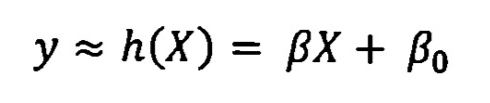

* 결과적으로 비용함수(Cost function)는 다음과 같이 최소화 될 수 있다. 

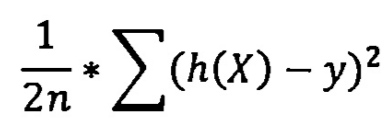


#### 제곱 오차를 사용하는 이유 
* 음수값을 제거. 따라서 정반대의 오차를 합산할 때 서로 상쇄되지 않는다. 
* 차이를 더 크게 강조한다. 제곱하면 절댓값의 단순 합계와 비교해 오차 합계를 비례적으로 증가시키기 때문이다.

In [25]:
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])
y = np.array([85, 95, 70, 65, 70])

In [26]:
def squared_cost(v,e):
 return np.sum((v-e)**2)

* scipy 패키지가 제공하는 fmin 최소화 프로시저를 사용하면 하나의 벡터에 대해 최소제곱 합계를 만드는 값을 계산해준다. 

In [27]:
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [28]:
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The mean is %0.1f' % (np.mean(x)))

The result of optimization is 7.8
The mean is 7.8


* 아래는 절대값을 비용함수로 사용하여 절대 오차의 합계를 최소회하는 값을 계산 

In [29]:
def absolute_cost(v,e):
 return np.sum(np.abs(v-e))

In [30]:
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [31]:
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The median is %0.1f' % (np.median(x)))

The result of optimization is 8.0
The median is 8.0


* 위의 결과는 중앙값을 계산했지만, 중앙값은 평균값과 동일한 통계적 특성을 갖지 않는다. 

### 역행렬 방법 
* 회귀 분석을 해결하고 비용 함수를 최소화하면서 데이터 계수 벡터를 얻기 위한 공식은 아래와 같다. 

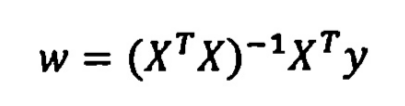

* 역행렬을 구하는 inv, pinv의 차이는 부동소수점 연산을 사용 여부의 차이

In [32]:
observations = len(perch_length)
X  = perch_length.reshape((observations,1)) # X should be always a matrix, never a vector
Xb = np.column_stack((X,np.ones(observations))) # We add the bias
y  = perch_weight # y can be a vector

def matrix_inverse(X,y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)),np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

print (matrix_inverse(Xb, y))
print (matrix_inverse(Xb, y, pseudo=True))
print (normal_equations(Xb, y))

[  36.93837597 -648.07755825]
[  36.93837597 -648.07755825]
[  36.93837597 -648.07755825]


### 경사하강법 

* 경사하강법은 휠씬 적은 계산을 사용해 선형회귀분석의 비용 함수를 최소화 할 수 있는 기법이다. 
* 기울기 하강 복잡도는 O(n*p)이므로, 큰 n(row data ), 큰 p(변수의 수)가 발생하는 경우에도 학습 회귀계수의 실현이 가능 

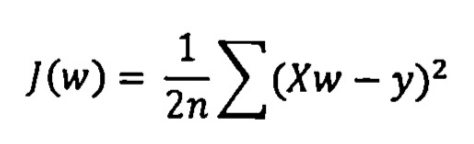

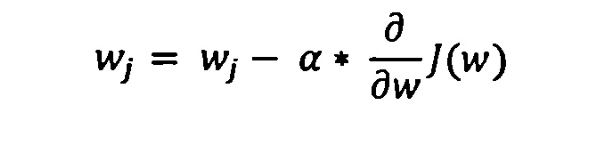

## 다항 회귀

* 단순 선형 회귀가 만든 직성이 왼쪽 아래로 쭉 뻗어 있어서 이 직선대로 예측하면 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수 없는 일입니다. 
* 왼쪽 위로 조금 구부러진 곡선을 찾아봅시다. 

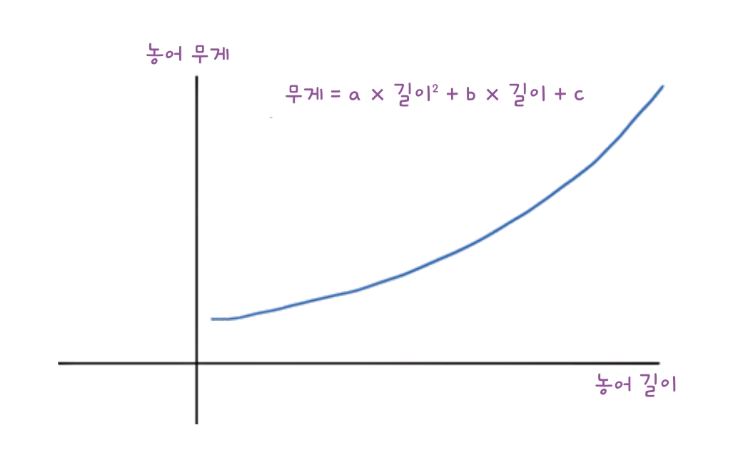

* 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야 합니다. 사실 넘파이를 사용하면 아주 간단히 만들 수 있습니다. 다음처럼 농어의 길이를 제곱해서 원래 데이터 앞에 붙이겠습니다.

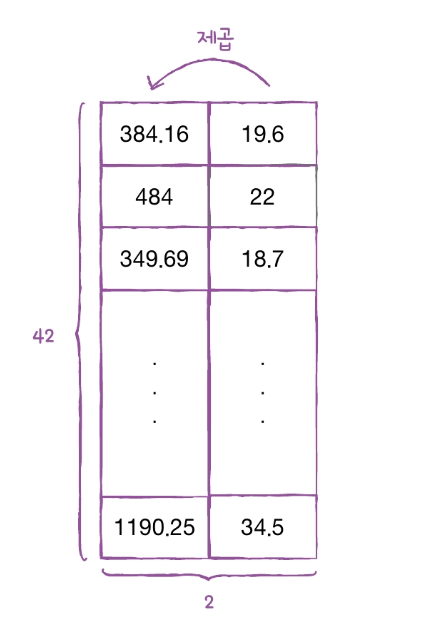

In [33]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [34]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [36]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


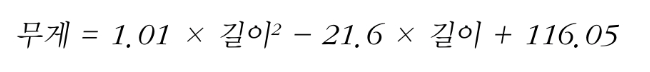

* 이런 방정식을 다항식(polynomial)이라고 부르며 다항식을 사용한 선형 회귀를 다항 회귀(polynomial regression)라고 부릅니다. 

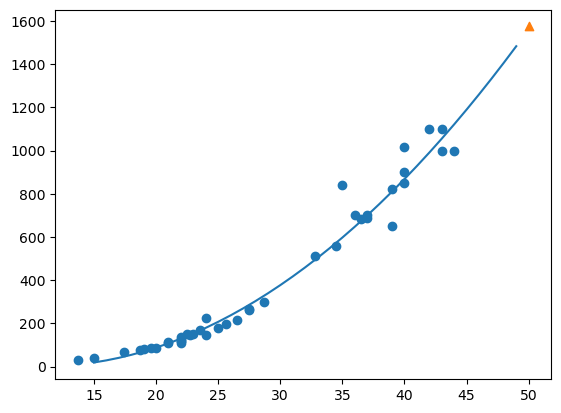

In [37]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [38]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


In [51]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

In [40]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [41]:
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y


    return (f, ws)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal
import warnings
warnings.filterwarnings(action='ignore')

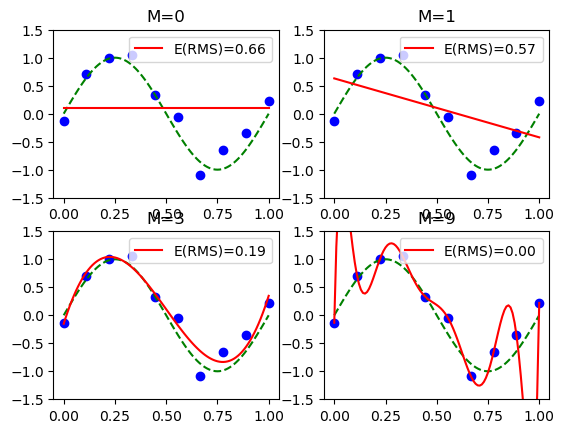

In [49]:

N=10          
M=[0,1,3,9]  
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()


fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws,name="M=%d" % m))

    subplot = fig.add_subplot(2,2,c+1)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)

    
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')

    
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)
    fig.show()

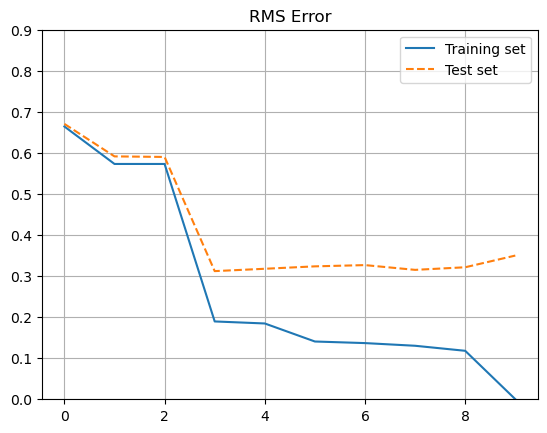

In [50]:
df = DataFrame(columns=['Training set','Test set'])
for m in range(0,10):   # 多項式の次数
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error],
                index=['Training set','Test set']),
            ignore_index=True)
df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))
plt.show()